In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()



import os

dir_data = r'C:/Users/sameer/Desktop/AJGAR/Exercise'
print(os.listdir(dir_data))

['pml-testing.csv', 'pml-training.csv']


In [5]:
train = pd.read_csv(r'C:/Users/sameer/Desktop/AJGAR/Exercise/pml-training.csv',index_col=[4])
# removes the first columns: seems to be the index
train.drop(train.columns[0],axis=1,inplace=True)
# removes columns which 51% of the data is NaN
train.dropna(axis=1,thresh=int(0.51*train.shape[0]),inplace=True)
train.head(3)

C:\Users\sameer\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (11,14,19,22,25,70,73,86,87,89,90,94,97,100) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,user_name,raw_timestamp_part_1,raw_timestamp_part_2,new_window,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
cvtd_timestamp,,,,,,,,,,,,,,,,,,,,,
05/12/2011 11:23,carlitos,1323084231,788290,no,11,1.41,8.07,-94.4,3,0.00,...,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
05/12/2011 11:23,carlitos,1323084231,808298,no,11,1.41,8.07,-94.4,3,0.02,...,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
05/12/2011 11:23,carlitos,1323084231,820366,no,11,1.42,8.07,-94.4,3,0.00,...,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A


C:\Users\sameer\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


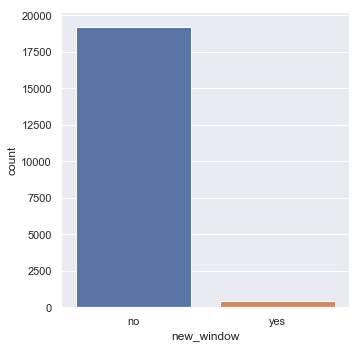

In [6]:
sns.factorplot('new_window',data = train,kind='count')

C:\Users\sameer\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


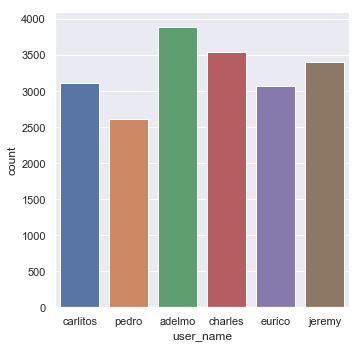

In [7]:
sns.factorplot('user_name',data = train,kind='count')

Text(0, 0.5, 'Num Window')

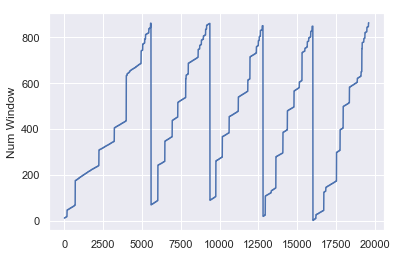

In [8]:
plt.plot(train['num_window'].values)
plt.ylabel('Num Window')

C:\Users\sameer\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


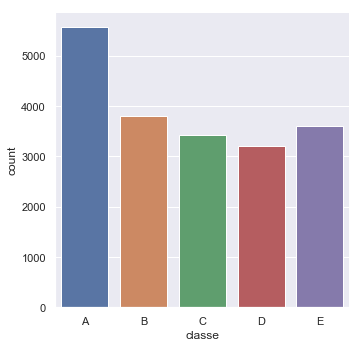

In [9]:
sns.factorplot('classe',data = train,kind='count')

In [10]:
def get_data_from(data,user_name):
    this_user_data = data[data['user_name']==user_name]
    unique_classes = np.unique(this_user_data['classe'])
    this_user_labels = this_user_data['classe'].map(lambda l: np.where(l==unique_classes)[0][0]).values
    this_user_data.drop('classe',axis=1,inplace=True)
    return (this_user_data,this_user_labels)

def get_data_from_position(data,position):
    # position can be: belt, arm, dumbbell, forearm
    return data.ix[:,[c.split('_')[1]==position or c.endswith(position) 
                                    for c in list(data.columns)]]

In [11]:
(adelmo_train,adelmo_labels) = get_data_from(train,'adelmo')
adelmo_belt = get_data_from_position(adelmo_train,'belt')
adelmo_arm = get_data_from_position(adelmo_train,'arm')
adelmo_dumbbell = get_data_from_position(adelmo_train,'dumbbell')
adelmo_forearm = get_data_from_position(adelmo_train,'forearm')

C:\Users\sameer\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\sameer\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


In [12]:
from sklearn.manifold import TSNE

tsne_belt = TSNE(2).fit_transform(adelmo_belt)
tsne_arm = TSNE(2).fit_transform(adelmo_arm)
tsne_dumbbell = TSNE(2).fit_transform(adelmo_dumbbell)
tsne_forearm = TSNE(2).fit_transform(adelmo_forearm)

Text(0.5, 1.0, 'Adelmo Forearm')

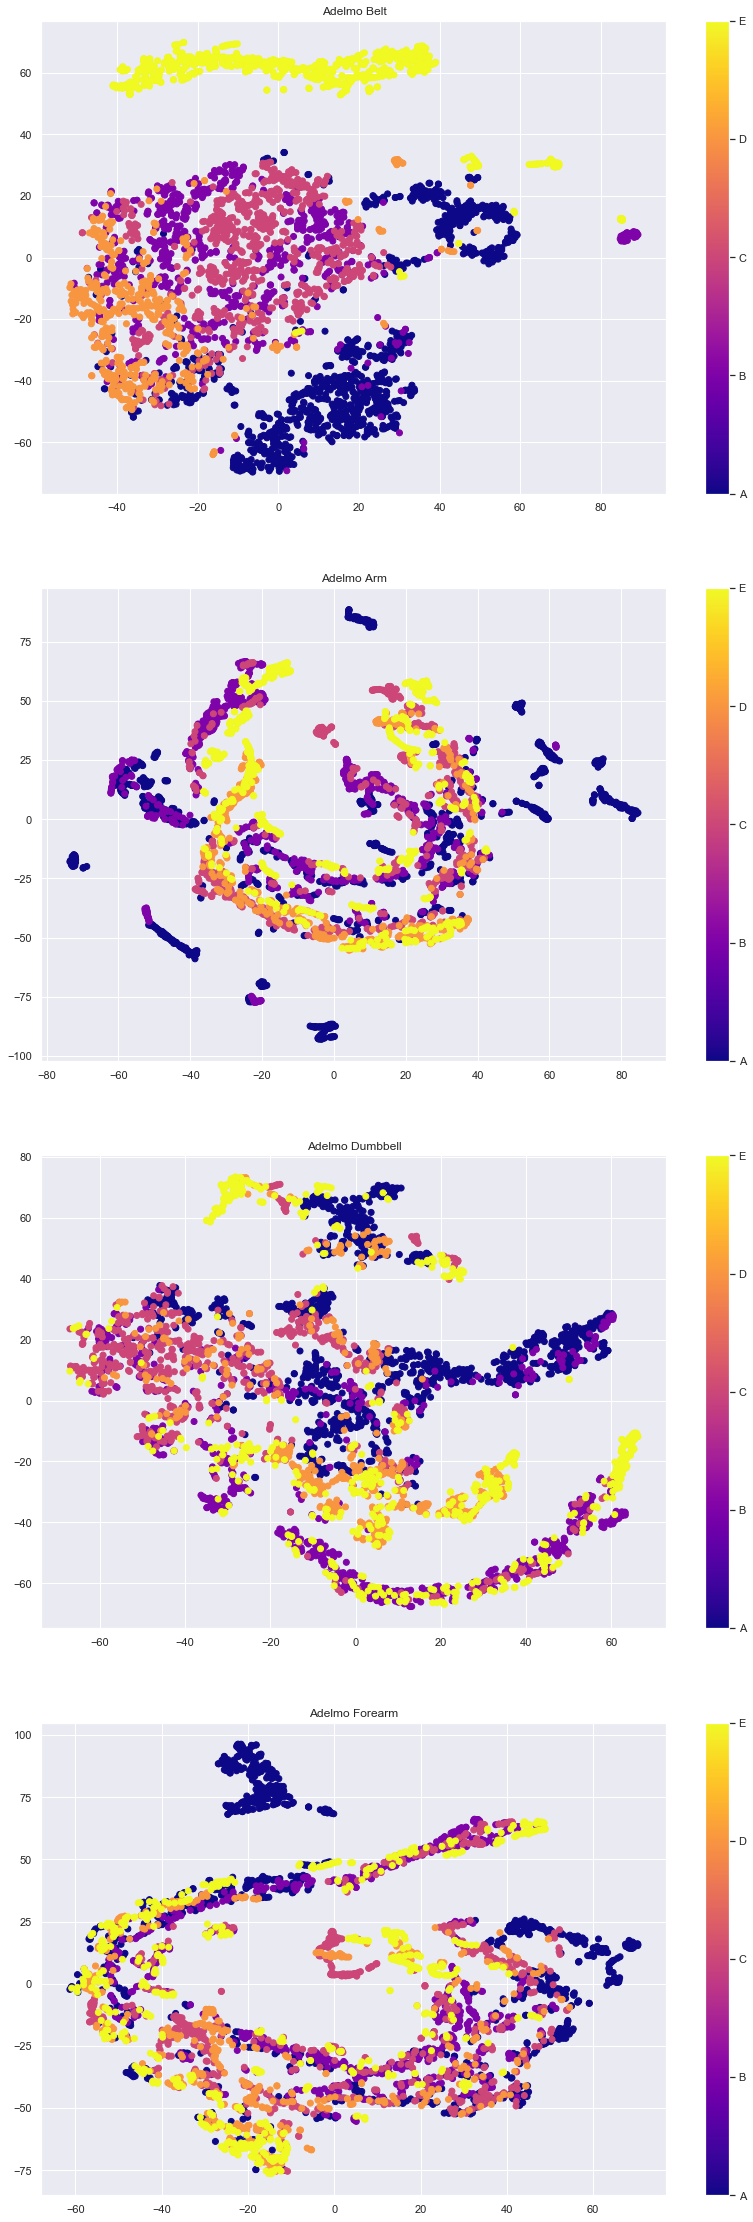

In [13]:
plt.figure(figsize=(14,40))
#Belt
plt.subplot(411)
plt.scatter(tsne_belt[:,0],tsne_belt[:,1],c=adelmo_labels,cmap='plasma')
cbar = plt.colorbar()
cbar.set_ticks(range(5))
cbar.set_ticklabels(['A','B','C','D','E'])
plt.title('Adelmo Belt')
#Arm
plt.subplot(412)
plt.scatter(tsne_arm[:,0],tsne_arm[:,1],c=adelmo_labels,cmap='plasma')
cbar = plt.colorbar()
cbar.set_ticks(range(5))
cbar.set_ticklabels(['A','B','C','D','E'])
plt.title('Adelmo Arm')
#Dumbbell
plt.subplot(413)
plt.scatter(tsne_dumbbell[:,0],tsne_dumbbell[:,1],c=adelmo_labels,cmap='plasma')
cbar = plt.colorbar()
cbar.set_ticks(range(5))
cbar.set_ticklabels(['A','B','C','D','E'])
plt.title('Adelmo Dumbbell')
#Forearm
plt.subplot(414)
plt.scatter(tsne_forearm[:,0],tsne_forearm[:,1],c=adelmo_labels,cmap='plasma')
cbar = plt.colorbar()
cbar.set_ticks(range(5))
cbar.set_ticklabels(['A','B','C','D','E'])
plt.title('Adelmo Forearm')

In [14]:


(charles_train,charles_labels) = get_data_from(train,'charles')
charles_belt = get_data_from_position(charles_train,'belt')
charles_arm = get_data_from_position(charles_train,'arm')
charles_dumbbell = get_data_from_position(charles_train,'dumbbell')
charles_forearm = get_data_from_position(charles_train,'forearm')



C:\Users\sameer\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\sameer\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


In [15]:
tsne_belt = TSNE(2).fit_transform(charles_belt)
tsne_arm = TSNE(2).fit_transform(charles_arm)
tsne_dumbbell = TSNE(2).fit_transform(charles_dumbbell)
tsne_forearm = TSNE(2).fit_transform(charles_forearm)

Text(0.5, 1.0, 'Charles Forearm')

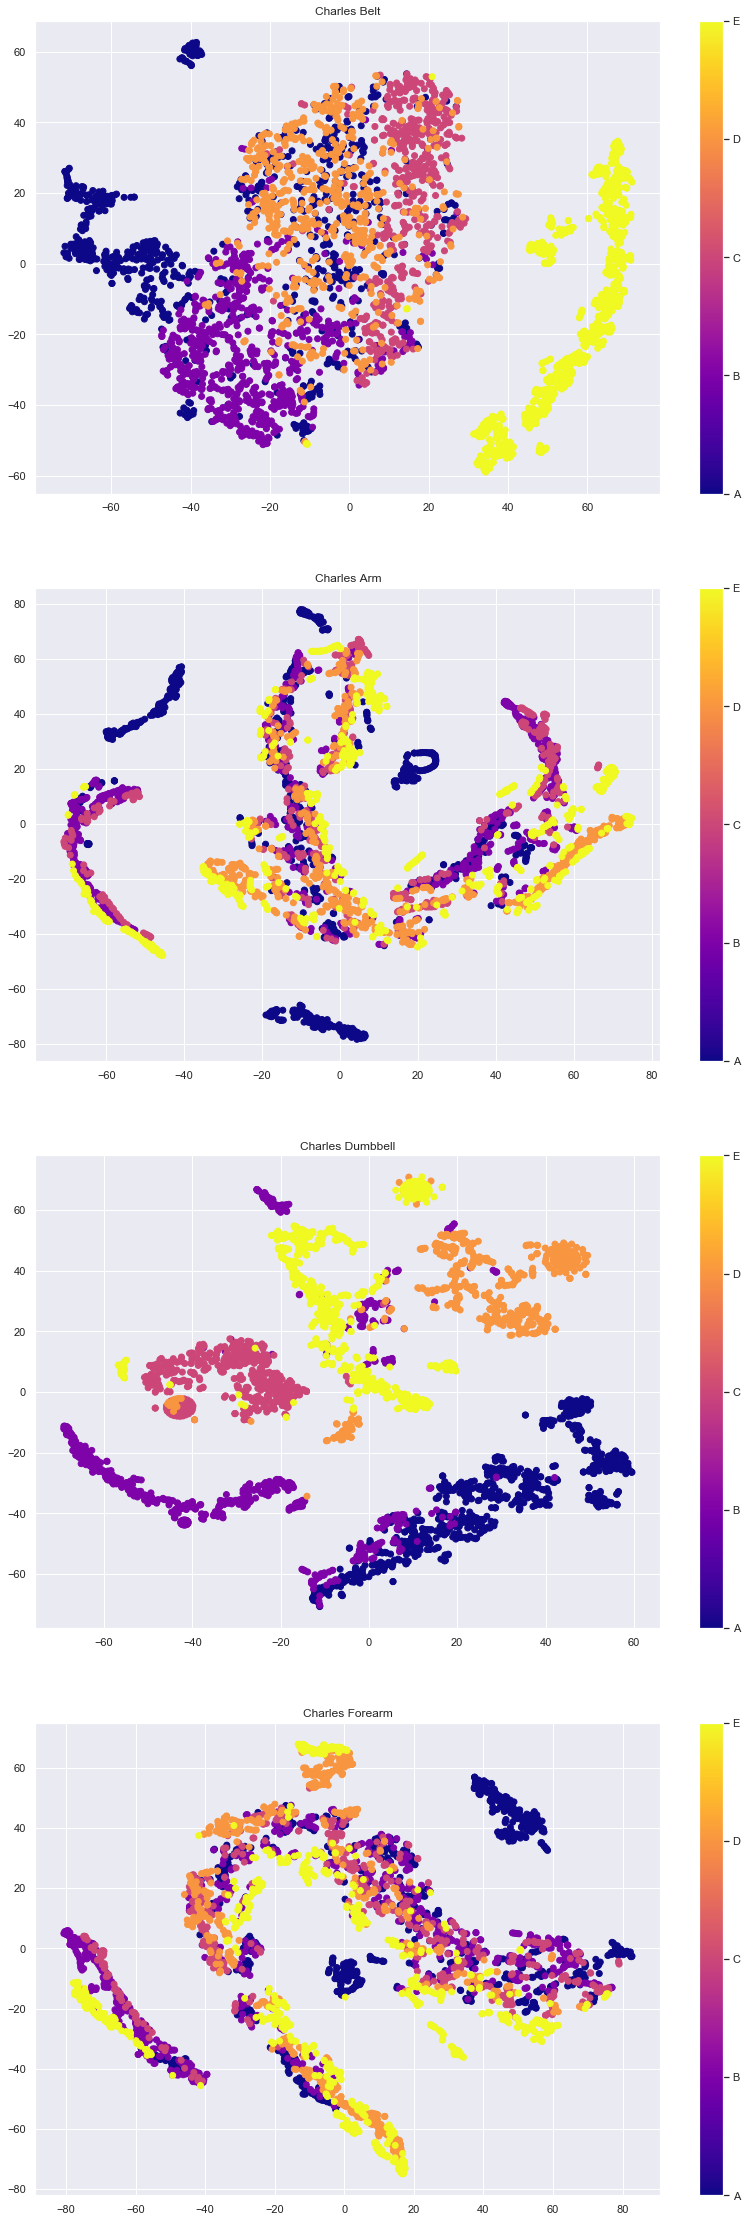

In [16]:
plt.figure(figsize=(14,40))
#Belt
plt.subplot(411)
plt.scatter(tsne_belt[:,0],tsne_belt[:,1],c=charles_labels,cmap='plasma')
cbar = plt.colorbar()
cbar.set_ticks(range(5))
cbar.set_ticklabels(['A','B','C','D','E'])
plt.title('Charles Belt')
#Arm
plt.subplot(412)
plt.scatter(tsne_arm[:,0],tsne_arm[:,1],c=charles_labels,cmap='plasma')
cbar = plt.colorbar()
cbar.set_ticks(range(5))
cbar.set_ticklabels(['A','B','C','D','E'])
plt.title('Charles Arm')
#Dumbbell
plt.subplot(413)
plt.scatter(tsne_dumbbell[:,0],tsne_dumbbell[:,1],c=charles_labels,cmap='plasma')
cbar = plt.colorbar()
cbar.set_ticks(range(5))
cbar.set_ticklabels(['A','B','C','D','E'])
plt.title('Charles Dumbbell')
#Forearm
plt.subplot(414)
plt.scatter(tsne_forearm[:,0],tsne_forearm[:,1],c=charles_labels,cmap='plasma')
cbar = plt.colorbar()
cbar.set_ticks(range(5))
cbar.set_ticklabels(['A','B','C','D','E'])
plt.title('Charles Forearm')